In [1]:
import pandas as pd

In [2]:
#) creating student_record_data and conerting into dataframe
df_record = pd.DataFrame()
df_record['student_name'] = [
    'Wyatt','Estelle','Heath','Imogene','Archer','Penelope','Henry','Violet','Theodore','Verity'
]
df_record['course']= [
    'AI','ML','DS','DE','DE','ML','ML','DS','AI','ML'
]
df_record['session'] = [
    'FN','AN','AN','AN','FN','FN','AN','FN','AN','FN'
]
df_record['year'] = [
    2024,2023,2022,2024,2023,2022,2024,2023,2022,2023
]
df_record['marks'] = [
    94.9,76.5,83.2,72.4,90.1,71.2,87.6,67.9,95.8,81.2
]
df_record['student_address'] = [
    'salem','chennai','erode','coimbatore','coimbatore','salem','erode','ooty','ooty','chennai'
]
df_record['gender'] = [
    'M','F','M','F','M','F','M','F','M','F'
]
df_record

,student_name,course,session,year,marks,student_address,gender
0,Wyatt,AI,FN,2024,94.9,salem,M
1,Estelle,ML,AN,2023,76.5,chennai,F
2,Heath,DS,AN,2022,83.2,erode,M
3,Imogene,DE,AN,2024,72.4,coimbatore,F
4,Archer,DE,FN,2023,90.1,coimbatore,M
5,Penelope,ML,FN,2022,71.2,salem,F
6,Henry,ML,AN,2024,87.6,erode,M
7,Violet,DS,FN,2023,67.9,ooty,F
8,Theodore,AI,AN,2022,95.8,ooty,M
9,Verity,ML,FN,2023,81.2,chennai,F


In [10]:
df_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_name     10 non-null     object 
 1   course           10 non-null     object 
 2   session          10 non-null     object 
 3   year             10 non-null     int64  
 4   marks            10 non-null     float64
 5   student_address  10 non-null     object 
 6   gender           10 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 692.0+ bytes


In [12]:
df_record.describe()

,year,marks
count,10.000000,10.000000
mean,2023.000000,82.080000
std,0.816497,9.964916
min,2022.000000,67.900000
25%,2022.250000,73.425000
50%,2023.000000,82.200000
75%,2023.750000,89.475000
max,2024.000000,95.800000


In [11]:
import pymongo

In [12]:
#) creating connection between jupyter notebook to mongodb
connection = pymongo.MongoClient('mongodb://127.0.0.1:27017/')

In [13]:
#) table creation
db = connection['D101']
collection = db['marks']

In [14]:
#) inserting dataframe record data into mongodb
my_data = []
for index in df_record.index:
    row = df_record.loc[index]
    row = row.to_dict()
    my_data.append(row)

In [16]:
#)inserting many data
collection.insert_many(my_data)

InsertManyResult([ObjectId('65dd9f1cdd6d8276a83892b9'), ObjectId('65dd9f1cdd6d8276a83892ba'), ObjectId('65dd9f1cdd6d8276a83892bb'), ObjectId('65dd9f1cdd6d8276a83892bc'), ObjectId('65dd9f1cdd6d8276a83892bd'), ObjectId('65dd9f1cdd6d8276a83892be'), ObjectId('65dd9f1cdd6d8276a83892bf'), ObjectId('65dd9f1cdd6d8276a83892c0'), ObjectId('65dd9f1cdd6d8276a83892c1'), ObjectId('65dd9f1cdd6d8276a83892c2')], acknowledged=True)

In [18]:
#) to show the inserted data in mongodb
for doc in collection.find():
    print(doc)

{'_id': ObjectId('65dd9f1cdd6d8276a83892b9'), 'student_name': 'Wyatt', 'course': 'AI', 'session': 'FN', 'year': 2024, 'marks': 94.9, 'student_address': 'salem', 'gender': 'M'}
{'_id': ObjectId('65dd9f1cdd6d8276a83892ba'), 'student_name': 'Estelle', 'course': 'ML', 'session': 'AN', 'year': 2023, 'marks': 76.5, 'student_address': 'chennai', 'gender': 'F'}
{'_id': ObjectId('65dd9f1cdd6d8276a83892bb'), 'student_name': 'Heath', 'course': 'DS', 'session': 'AN', 'year': 2022, 'marks': 83.2, 'student_address': 'erode', 'gender': 'M'}
{'_id': ObjectId('65dd9f1cdd6d8276a83892bc'), 'student_name': 'Imogene', 'course': 'DE', 'session': 'AN', 'year': 2024, 'marks': 72.4, 'student_address': 'coimbatore', 'gender': 'F'}
{'_id': ObjectId('65dd9f1cdd6d8276a83892bd'), 'student_name': 'Archer', 'course': 'DE', 'session': 'FN', 'year': 2023, 'marks': 90.1, 'student_address': 'coimbatore', 'gender': 'M'}
{'_id': ObjectId('65dd9f1cdd6d8276a83892be'), 'student_name': 'Penelope', 'course': 'ML', 'session': 'F

In [17]:
#) import mysql module
import mysql.connector

In [89]:
#) creating the connection and database in sql from jupyter notebook
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Rudra@014',
    auth_plugin = 'mysql_native_password',
    database = 'd101'
)
cursor = connection.cursor()

In [90]:
#) ctreate table marks in sql
query = """create table marks(student_name varchar(100), course varchar(30), session varchar(100), year int,
       mark float, student_address varchar(100), gender varchar(100))"""
cursor.execute(query)

In [91]:
#) show the column name from marks table
query = "DESC marks"
cursor.execute(query)
result = cursor.fetchall()
for col in result:
    print(col[0],col[1])

student_name varchar(100)
course varchar(30)
session varchar(100)
year int
mark float
student_address varchar(100)
gender varchar(100)


In [92]:
#) insert df_record into sql database
query = "insert into marks values(%s,%s,%s,%s,%s,%s,%s)"
data_points = []
for index in df_record.index:
    row = df_record.loc[index].values
    row = tuple([str(d) for d in row])
    data_points.append(row)
cursor.executemany(query,data_points)
connection.commit()

In [93]:
#) show the data from marks table
query ="select * from marks"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Wyatt', 'AI', 'FN', 2024, 94.9, 'salem', 'M')
('Estelle', 'ML', 'AN', 2023, 76.5, 'chennai', 'F')
('Heath', 'DS', 'AN', 2022, 83.2, 'erode', 'M')
('Imogene', 'DE', 'AN', 2024, 72.4, 'coimbatore', 'F')
('Archer', 'DE', 'FN', 2023, 90.1, 'coimbatore', 'M')
('Penelope', 'ML', 'FN', 2022, 71.2, 'salem', 'F')
('Henry', 'ML', 'AN', 2024, 87.6, 'erode', 'M')
('Violet', 'DS', 'FN', 2023, 67.9, 'ooty', 'F')
('Theodore', 'AI', 'AN', 2022, 95.8, 'ooty', 'M')
('Verity', 'ML', 'FN', 2023, 81.2, 'chennai', 'F')


In [94]:
#)select the data of coloumn course 'DS'
query = "select * from marks where course='DS'"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Heath', 'DS', 'AN', 2022, 83.2, 'erode', 'M')
('Violet', 'DS', 'FN', 2023, 67.9, 'ooty', 'F')


In [95]:
#)select the data of coloumn course 'DE'
query = "select * from marks where course='DE'"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Imogene', 'DE', 'AN', 2024, 72.4, 'coimbatore', 'F')
('Archer', 'DE', 'FN', 2023, 90.1, 'coimbatore', 'M')


In [96]:
#)select the data of coloumn 'AI'
query = "select * from marks where course='AI'"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Wyatt', 'AI', 'FN', 2024, 94.9, 'salem', 'M')
('Theodore', 'AI', 'AN', 2022, 95.8, 'ooty', 'M')


In [97]:
#)select the data of coloumn 'ML'
query = "select * from marks where course='ML'"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Estelle', 'ML', 'AN', 2023, 76.5, 'chennai', 'F')
('Penelope', 'ML', 'FN', 2022, 71.2, 'salem', 'F')
('Henry', 'ML', 'AN', 2024, 87.6, 'erode', 'M')
('Verity', 'ML', 'FN', 2023, 81.2, 'chennai', 'F')


In [98]:
#)select the data of coloumn session'FN'
query = "select * from marks where session='FN'"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Wyatt', 'AI', 'FN', 2024, 94.9, 'salem', 'M')
('Archer', 'DE', 'FN', 2023, 90.1, 'coimbatore', 'M')
('Penelope', 'ML', 'FN', 2022, 71.2, 'salem', 'F')
('Violet', 'DS', 'FN', 2023, 67.9, 'ooty', 'F')
('Verity', 'ML', 'FN', 2023, 81.2, 'chennai', 'F')


In [99]:
#)select the data of column session 'AN'
query = "select * from marks where session='AN'"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Estelle', 'ML', 'AN', 2023, 76.5, 'chennai', 'F')
('Heath', 'DS', 'AN', 2022, 83.2, 'erode', 'M')
('Imogene', 'DE', 'AN', 2024, 72.4, 'coimbatore', 'F')
('Henry', 'ML', 'AN', 2024, 87.6, 'erode', 'M')
('Theodore', 'AI', 'AN', 2022, 95.8, 'ooty', 'M')


In [100]:
#)select the data of column year 2024
query = "select * from marks where year=2024"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Wyatt', 'AI', 'FN', 2024, 94.9, 'salem', 'M')
('Imogene', 'DE', 'AN', 2024, 72.4, 'coimbatore', 'F')
('Henry', 'ML', 'AN', 2024, 87.6, 'erode', 'M')


In [101]:
#)select the data of column year 2023
query = "select * from marks where year=2023"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Estelle', 'ML', 'AN', 2023, 76.5, 'chennai', 'F')
('Archer', 'DE', 'FN', 2023, 90.1, 'coimbatore', 'M')
('Violet', 'DS', 'FN', 2023, 67.9, 'ooty', 'F')
('Verity', 'ML', 'FN', 2023, 81.2, 'chennai', 'F')


In [102]:
#)select the data of column year 2022
query = "select * from marks where year=2022"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Heath', 'DS', 'AN', 2022, 83.2, 'erode', 'M')
('Penelope', 'ML', 'FN', 2022, 71.2, 'salem', 'F')
('Theodore', 'AI', 'AN', 2022, 95.8, 'ooty', 'M')


In [103]:
#) select student_name, year from marks
query = "select student_name, year from marks"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Wyatt', 2024)
('Estelle', 2023)
('Heath', 2022)
('Imogene', 2024)
('Archer', 2023)
('Penelope', 2022)
('Henry', 2024)
('Violet', 2023)
('Theodore', 2022)
('Verity', 2023)


In [104]:
#) select student_name, course from marks
query = "select student_name, course from marks"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Wyatt', 'AI')
('Estelle', 'ML')
('Heath', 'DS')
('Imogene', 'DE')
('Archer', 'DE')
('Penelope', 'ML')
('Henry', 'ML')
('Violet', 'DS')
('Theodore', 'AI')
('Verity', 'ML')


In [105]:
#) select student_name, course,gender from marks
query = "select student_name, course,gender from marks"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Wyatt', 'AI', 'M')
('Estelle', 'ML', 'F')
('Heath', 'DS', 'M')
('Imogene', 'DE', 'F')
('Archer', 'DE', 'M')
('Penelope', 'ML', 'F')
('Henry', 'ML', 'M')
('Violet', 'DS', 'F')
('Theodore', 'AI', 'M')
('Verity', 'ML', 'F')


In [106]:
#) select student_name, course,address from marks
query = "select student_name, course,student_address from marks"
cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Wyatt', 'AI', 'salem')
('Estelle', 'ML', 'chennai')
('Heath', 'DS', 'erode')
('Imogene', 'DE', 'coimbatore')
('Archer', 'DE', 'coimbatore')
('Penelope', 'ML', 'salem')
('Henry', 'ML', 'erode')
('Violet', 'DS', 'ooty')
('Theodore', 'AI', 'ooty')
('Verity', 'ML', 'chennai')


In [107]:
#) to get min and max mark
query = "select min(mark),max(mark) from marks"
cursor.execute(query)
for data in cursor.fetchall():
    print(data)

(67.9, 95.8)


In [48]:
#) converting df to list
list_course = df_record['course'].tolist()
print(list_course)

['AI', 'ML', 'DS', 'DE', 'DE', 'ML', 'ML', 'DS', 'AI', 'ML']


In [52]:
list_session = df_record['session'].tolist()
print(list_session)

['FN', 'AN', 'AN', 'AN', 'FN', 'FN', 'AN', 'FN', 'AN', 'FN']


In [11]:
list_year = df_record['year'].tolist()
print(list_year)

[2024, 2023, 2022, 2024, 2023, 2022, 2024, 2023, 2022, 2023]


In [113]:
list_marks = df_record['marks'].tolist()
print(list_marks)

[94.9, 76.5, 83.2, 72.4, 90.1, 71.2, 87.6, 67.9, 95.8, 81.2]


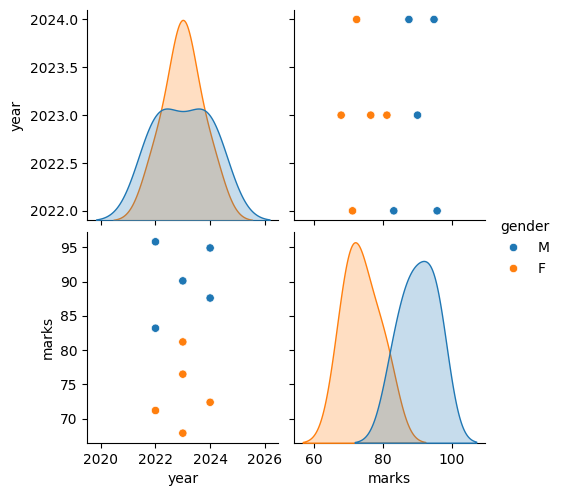

In [9]:
#) pair plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.pairplot(data=df_record,hue="gender")
plt.show()

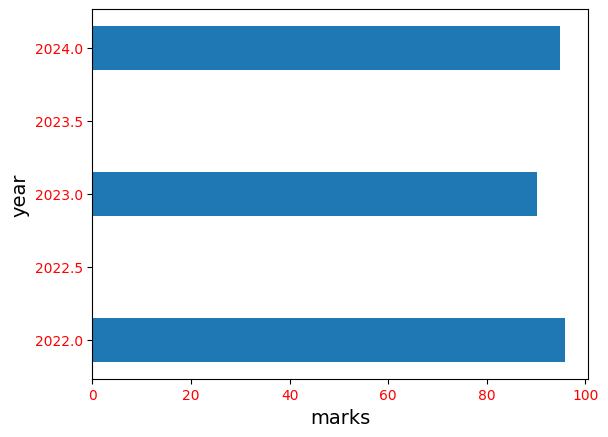

In [14]:
#) horizontal bar plot
plt.barh(list_year,list_marks,height=0.3)
plt.xlabel("marks",fontsize=14)
plt.ylabel("year",fontsize=14)
plt.xticks(color="red")
plt.yticks(color="red")
plt.show()

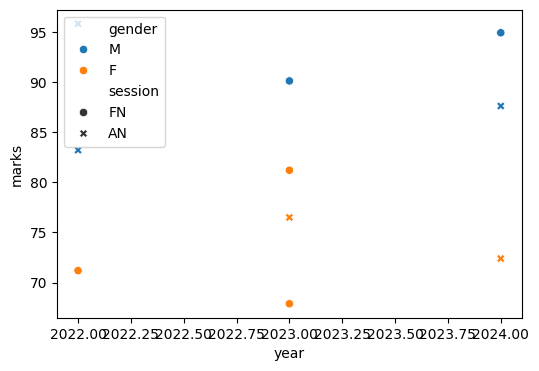

In [69]:
#) scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_record,x ="year",y= "marks",hue="gender",style="session")
plt.show()

In [3]:
#) scatter plot in dashboard 
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
from dash import Dash,html,dcc,Input,Output,callback


fig = px.scatter(df_record,x='year',y='marks')

app = Dash()
min_value = df_record['year'].min()
max_value = df_record['year'].max()
avg_value = df_record['year'].mean()

app.layout = html.Div(children = [
    dcc.Slider(min_value,max_value,value=avg_value,id="my_input"),
    dcc.Graph(id="my_out")
])
@callback(Output("my_out","figure"),Input("my_input","value"))
def updateGraph(value):
    df_temp = df_record[df_record['year']<=value]
    fig = px.scatter(df_temp,x='year',y='marks')
    return fig
app.run_server(port=2233)